# <center>Assignment 5: Fraud Detection by Autoencoder </center>

In this assignment, you'll apply autencoders to detect credit card frauds. This is an unsupervised approach to anomaly detection. Typically most credit card transactions are normal and frauds are rare events. It is easy to obtain normal transactions, but it can be difficult to collect sufficient frauds such that a supervised model can be trained.

The basic idea is that we <b>train an autoencoder model using only normal samples. Fed with a new transaction, if the model cannot succesfully reconstruct it and leads to a large reconstruction error, an alarm can be raised to signify that this transaction is "off the chart"</b>.

In this assignment, we'll use a dataset of credit card transactions. The training dataset (creditcard_train.csv) contains all normal samples (i.e. target class is all negiative), while the test dataset (creditcard_test.csv) contains mixed positive and negative samples for you to evaluate the model performance only. The class label can be found in the column named "Class" inthe test dataset. 

Note, for this dataset, it is not guaranteed that autoencoders can deliver the best performance. We just use the dataset to practice autoencoder models.

A snapshot of the data is also shown below.

In [ ]:
# import package
import pandas as pd


In [ ]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(231)

In [ ]:
data = pd.read_csv('creditcard_train.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
test = pd.read_csv('creditcard_test.csv')
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


### Task 1: Data preprocess

1. `Sample normalization`: Notice that columns (e.g. Amount column) in the datasets are in different scales. For autoencoder, since the loss is the reconstruction error, it's always necessary to normalize the data to avoid computation overflow of the error (i.e. approaching infinite). For example, variables can be normalized to a range between [0,1] through min_max normalization so that sigmoid activation can be used at the end and loss can be controled within a range. 
2. Split the traininng dataset into train and validation subsets so that you can use the validation dataset to control the train progress.
3. (optional) You can establish a baseline model using traditional approach, for example, KNN, T-SNE etc.

In [ ]:
# preprocess data

# Add your code here

### Task 2: Anomaly detection by deep autoencoder

**Requirements**:
1. First, create a `deep autoencoder` as follows:
    - Create a deep encoder with at least 2 hidden layers in both encoder and decoder. 
    - For visualization, set the dimension of the bottleneck layer to 2 or 3
    - Train the autoencoder using the train/validation subsets
2. After training, reconstruct samples in the test dataset and calculate the `reconstruction error`.
3. Plot the histogram of the reconstruction errors of positive/negative classes in the test dataset
4. Choose an appropriate `threshold` and predict a sample is positive if its `construction error is greater than this threshold`.
5. Calculate precision, recall, f1, and ROC AUC score after you determine the threshold
6. Extract the `latent variables` in the bottleneck layer for the test samples, plot these variables in a scatter plot, and use different colors to differenitate samples in different classes.
7. Analysis:
    - Describe how you choose the hyperparameters, e.g. dimension of each layer, activation function, loss function etc.
    - Discuss whether you are able to differentiate samples from these two classes by reconstruction errors. What is the appropriate threshold?
    - From the scatter plot, do you think samples in both classes can be cleanly separated in the latent space?

Feel free to use the code in our lab material.

In [ ]:
# Define deep autoencoder model

# Add your code here


In [ ]:
# Compile and train model

# Add your code here


In [ ]:
# Predict samples in the test dataset and calculate reconstruction errors

# Add your code here


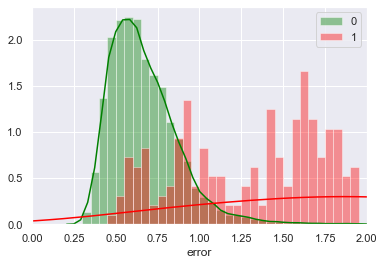

In [ ]:
# Plot reconstruction error of test samples

# Add your code here

# Note you may get plots different from the below
# There is no unique solution to this problem

In [ ]:
# Decide a threshold and calculate performance

# Add your code here


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.81      0.81      0.81       492

    accuracy                           0.98     10492
   macro avg       0.90      0.90      0.90     10492
weighted avg       0.98      0.98      0.98     10492

auc score 0.958


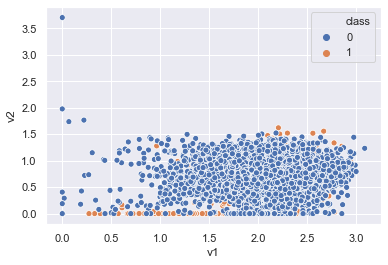

In [ ]:
# Plot scatter plot for the latent variables

# Add your code here

### Task 3:  Anomaly detection by VAE

**Requirements**
1. Create a VAE model and complete Requirements (1)-(5) as stated in Task 2 
2. Use scatter plots to show the latent `mean` and `variance` produced by the latent layer for each class of samples in the test dataset. Do you think the latent layer is able to differentiate samples in these two classes? Could you explain why the mean and variance are distributed in such ways?
2. Compare the results you obtained in both models and comment on pros and cons of each model, e.g. performance, stability, robustness etc.

In [ ]:
# Define VAE model

# Add your code here

In [ ]:
# Compile and train VAE model

# Add your code here

In [ ]:
# Predict test samples and calculate reconstruction errors

# Add your code here

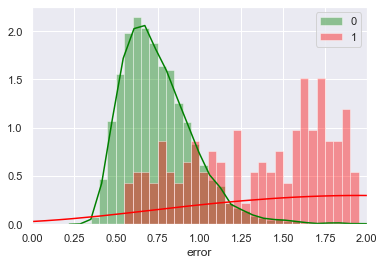

In [ ]:
# Plot reconstruction errors

# Add your code here

In [ ]:
# Determine a threshold and calculate performance

# Add your code here

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.79      0.79      0.79       492

    accuracy                           0.98     10492
   macro avg       0.89      0.89      0.89     10492
weighted avg       0.98      0.98      0.98     10492

auc score 0.954


In [ ]:
# Extract latent mean and variance 

# Add your code here

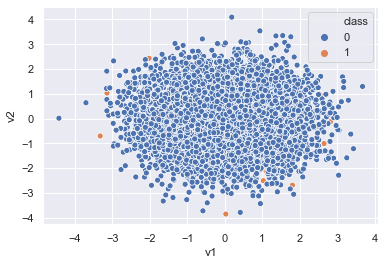

In [ ]:
# plot latent mean

# Add your code here


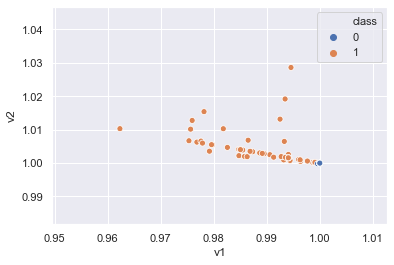

In [ ]:
# plot latent variance

# Add your code here